In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ames_df = pd.read_csv('./data/train.csv')

In [3]:
ames_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
ames_df.shape

(1460, 81)

In [5]:
###analysis of numerical columns


In [6]:
ames_num_df =ames_df[]


SyntaxError: invalid syntax (<ipython-input-6-b2e12b6ecc17>, line 1)

In [14]:
num_features = ['LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'SalePrice']

In [172]:
ames_num_df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [8]:
ames_num_df.isnull().sum(axis=0)


LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

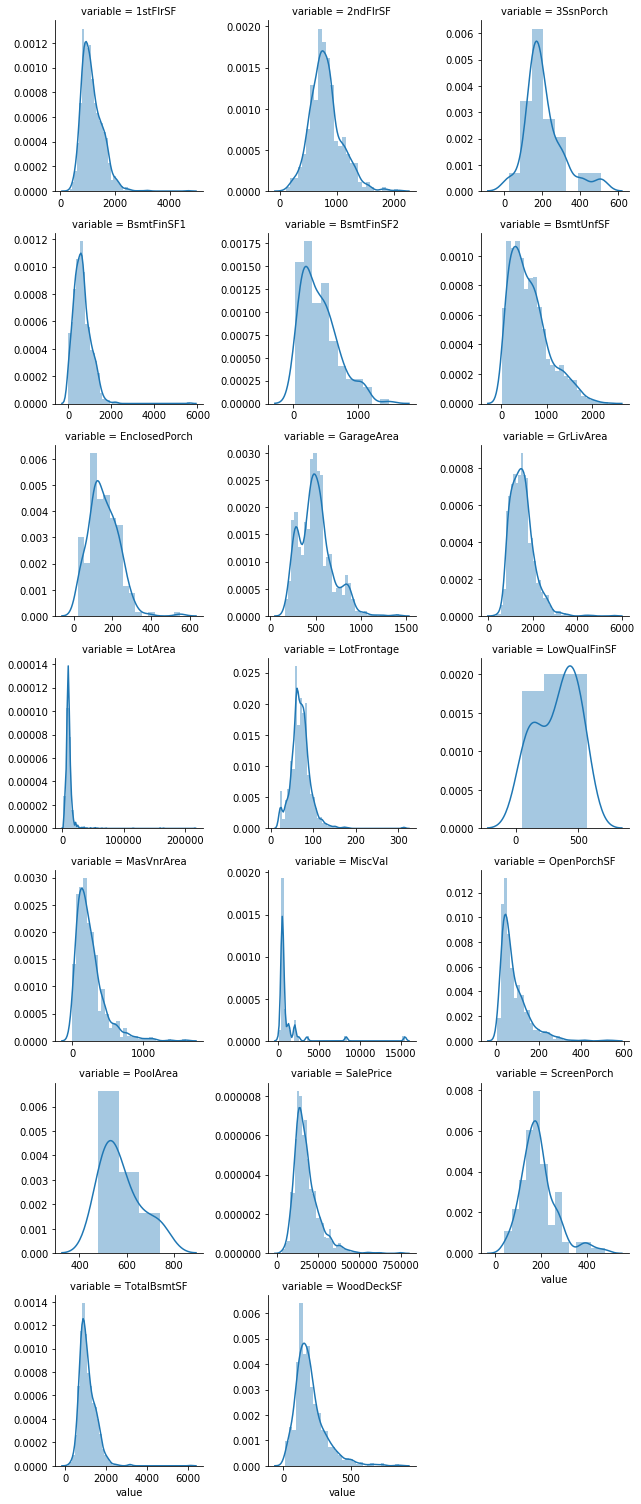

In [15]:
f = pd.melt(ames_num_df[ames_num_df>0], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

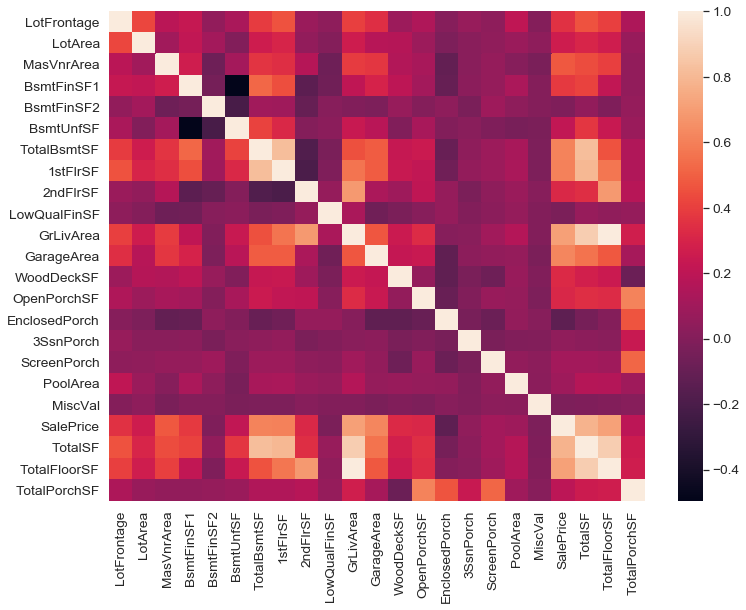

In [34]:
corMatrix = ames_num_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corMatrix)

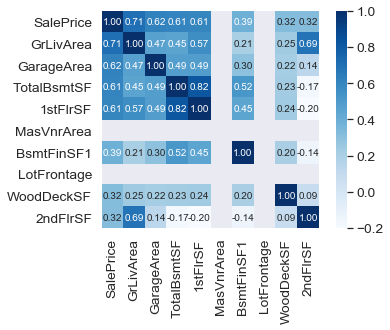

In [17]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corMatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames_num_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="Blues", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
#standard target and numerical
##adding some numerical features that are usually looked at together

ames_num_df['TotalSF'] = ames_num_df.TotalBsmtSF + ames_num_df.GrLivArea
ames_num_df['TotalFloorSF'] = ames_num_df['1stFlrSF'] + ames_num_df['2ndFlrSF']
ames_num_df['TotalPorchSF'] = ames_num_df.OpenPorchSF + ames_num_df.EnclosedPorch + \
    ames_num_df['3SsnPorch'] + ames_num_df.ScreenPorch

In [19]:
ames_std_df = ames_num_df.copy()
ames_std_df['SalePrice'] = np.log(ames_num_df['SalePrice'])
ames_std_df['SalePrice'] = StandardScaler().fit_transform(ames_std_df['SalePrice'][:,np.newaxis])


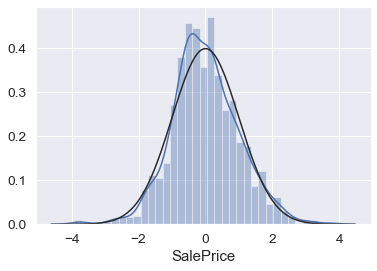

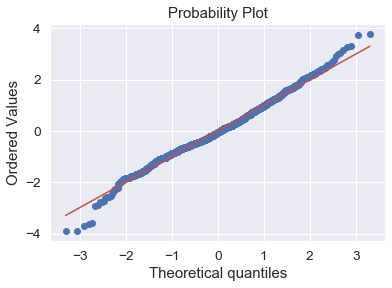

In [20]:
#plot standardized sales. distribution right skewed
sns.distplot(ames_std_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(ames_std_df['SalePrice'], plot=plt)

In [180]:
#impute missing values using KNN -- use all features to impute missing values for LotFrontage & MasVnr
# LotFrontage      259
# MasVnrArea         8
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= round(np.sqrt(ames_num_df.shape[0])))
ames_std_df['LotFrontage'] = imputer.fit_transform(ames_df['LotFrontage'][:,np.newaxis])
ames_std_df['MasVnrArea'] = imputer.fit_transform(ames_df['MasVnrArea'][:,np.newaxis])


In [21]:
ames_std_df.isnull().sum(axis=0)


LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
TotalSF            0
TotalFloorSF       0
TotalPorchSF       0
dtype: int64

In [22]:
# transform all numerical values
num_features = ames_std_df.columns
num_features = num_features.drop(['SalePrice'])
fitted_lambda = {}

for f in num_features:
    ames_std_df.loc[:,f] = np.log1p(ames_std_df[f])



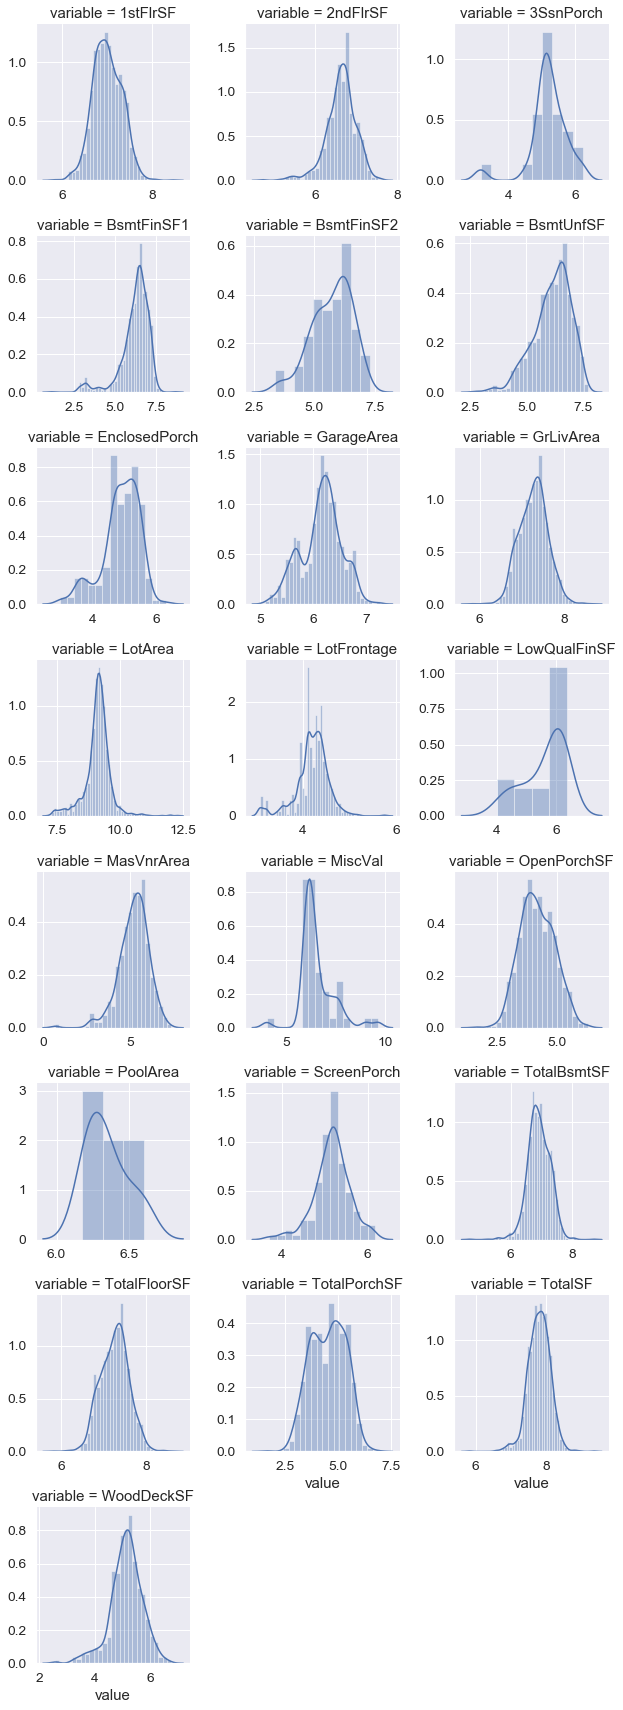

In [23]:
#density plots after log transforms
f = pd.melt(ames_std_df[ames_std_df > 0], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

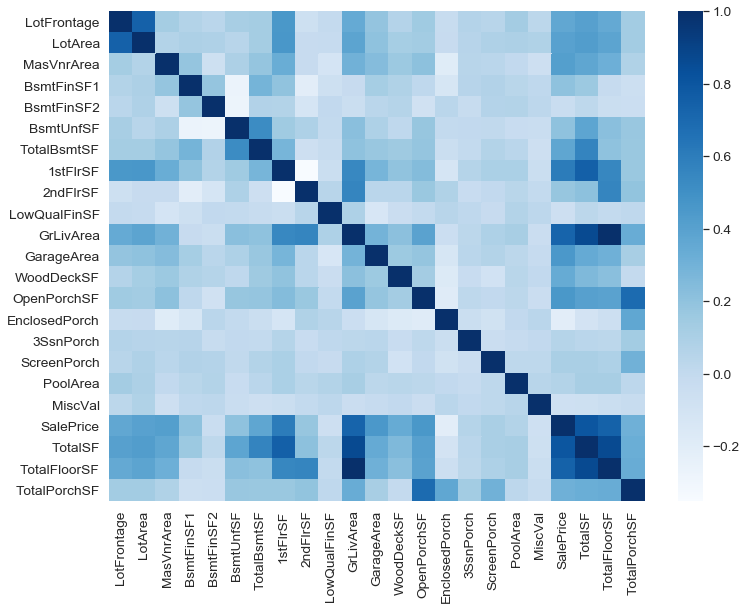

In [24]:
#plot_correlation plot after standardization
corMatrix = ames_std_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corMatrix, cmap="Blues")

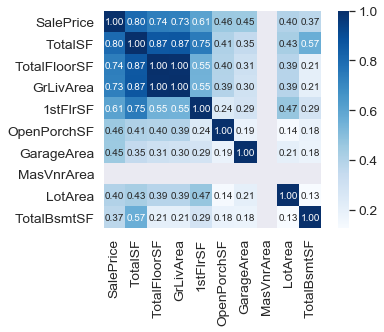

In [25]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corMatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames_std_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="Blues", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

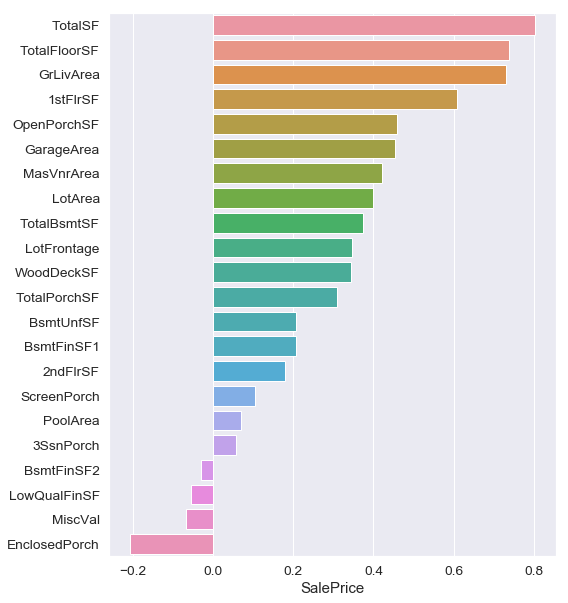

In [186]:
#another view of correlation to saleprice
corr = corMatrix.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

In [30]:
#introduce booleans to tag measurement of 0 as meaning the feature doesn't exist.
run_it = 1

if(run_it):
    temp = pd.DataFrame(np.sum(ames_std_df == 0, axis=0))
    idx_list = temp[temp.values > 0].index
    for idx in idx_list:
        key_= 'Has'+ idx
        ames_std_df[key_] = ames_std_df[idx].apply(lambda x: 1 if x > 0 else 0)
    run_it =0
    


In [31]:
##standardize numerical predictors
for f in num_features:
    ames_std_df[f] = StandardScaler().fit_transform(ames_std_df[f][:,np.newaxis])

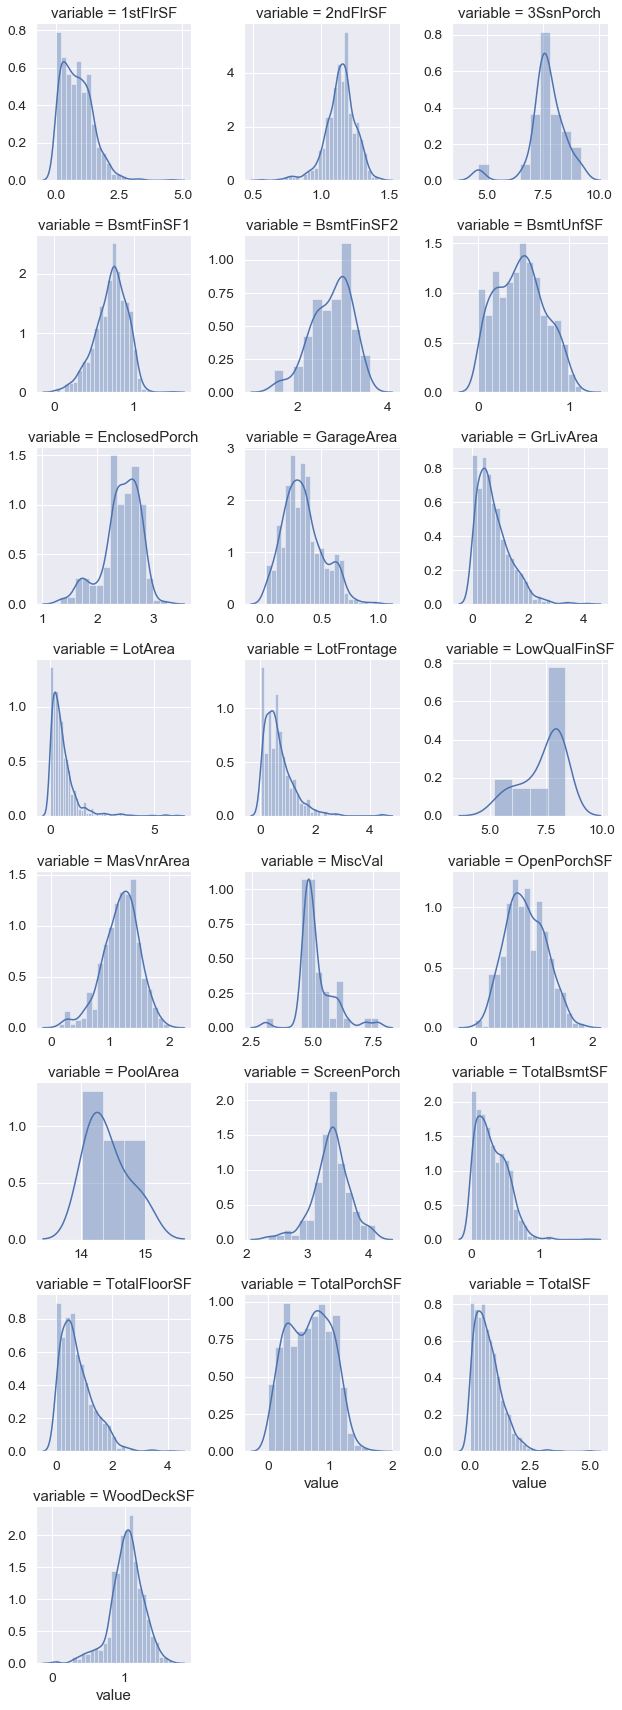

In [35]:
#density plots after log transforms -- don't know how to show distribution without the transform 0 values
f = pd.melt(ames_std_df[ames_std_df > 0], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

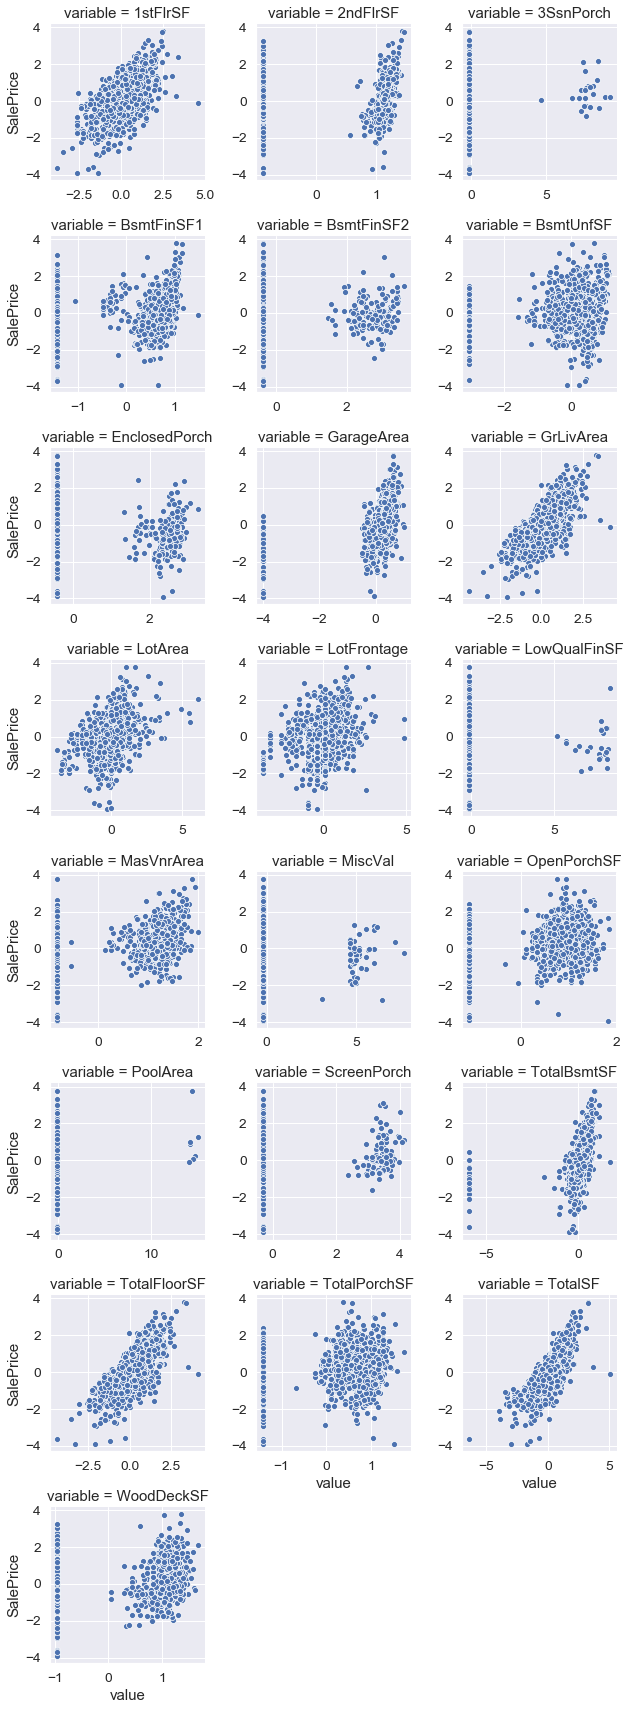

In [189]:
##scatter plot of saleprice vs the standardized predictors
f = pd.melt(ames_std_df, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.scatterplot, 'value', 'SalePrice')
plt.show()

In [26]:
#prepare to train data
#y = ames_df['SalePrice']
y = np.log1p(ames_df['SalePrice'])
#ames_std_df.drop('SalePrice', axis=1, inplace=True)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso

In [28]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [33]:
X_train, X_test, y_train, y_test = \
    train_test_split(ames_std_df.copy(), y, test_size=0.3, random_state=42)
#code from kaggle notebook. yet to customize this.
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

LASSO dropped 9 of 38 features.


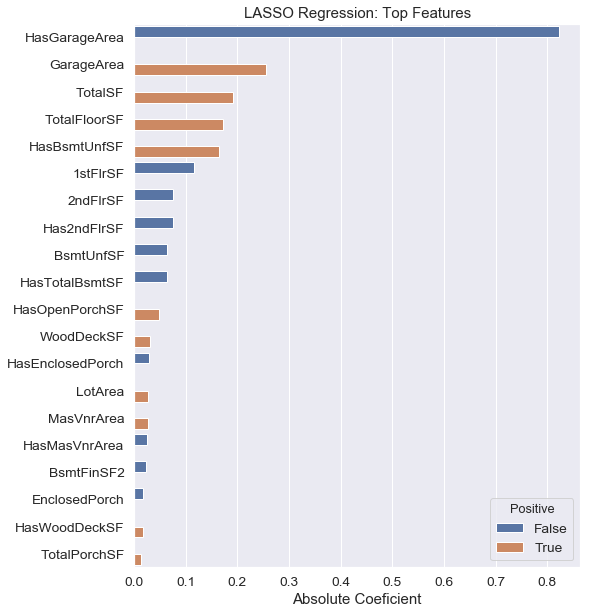

In [204]:
# Let's take a look at what the LASSO regression made of our features.
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()